In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
%matplotlib inline

LOADING THE NECESSARY DATA-SETS

In order to test the accuracy of models, the predicted values will be compared with bitcoin market prices in the first two weeks of Feb 2018. This is what is loaded in 'test_y'.

In [2]:
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')
test_y = pd.read_csv('test_compare.csv', dtype = float)

DATA EXPLORATION AND DATA VISUALIZATION

In [3]:
data['year'] = pd.DatetimeIndex(data['Date']).year

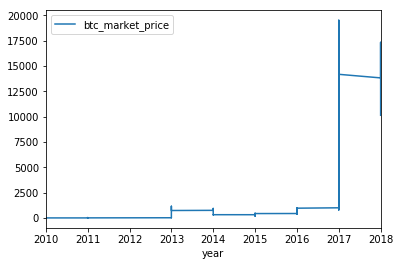

In [4]:
data.plot(x = 'year', y = 'btc_market_price')

The above visualization gives an idea of how the prices of bitcoins have increased since 2010. They were more or less in the same price range until 2017, during which there was a huge spike with a lot of volatilty. Since then the prices have steadily increased. This is an indication that the predicted values will have a huge range, and this has to be factored into while building models.

UNDERSTANDING THE RANGE OF VALUES OF THE FEATURES

Based on a basic understanding of bitcoin pricing, it is evident that certain features will have values whose range is similar to that of the market price of bitcoin. On the other hand, some features may not move in the same manner. It is important to understand which features are those in order to build an effective model. For instance, if a feature has 80% of the values as the same, then it may not be very useful in predicting the market price.

BTC_BLOCKS_SIZE

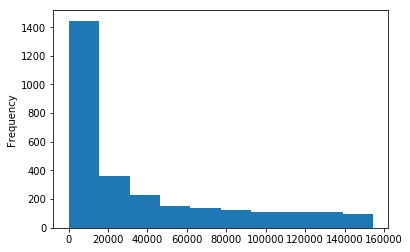

In [5]:
data.iloc[:,5].plot(kind = 'hist')

BTC_AVG_BLOCK_SIZE

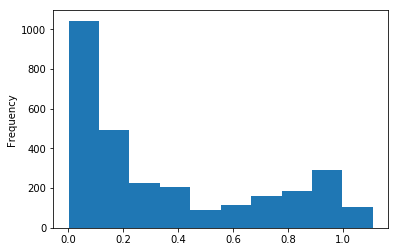

In [6]:
data.iloc[:,6].plot(kind = 'hist')

BTC_N_ORPHANED_BLOCKS

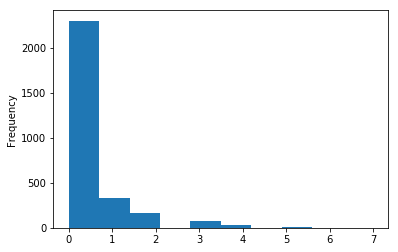

In [7]:
data.iloc[:,7].plot(kind = 'hist')

BTC_TRANSACTIONS_PER_BLOCK

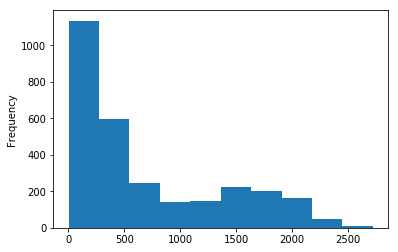

In [8]:
data.iloc[:,8].plot(kind = 'hist')

BTC_MEDIAN_CONFIRMATION_TIME

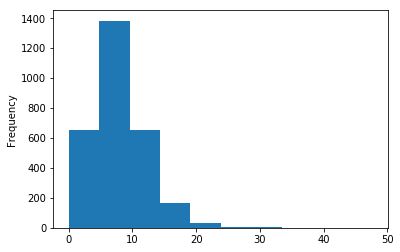

In [9]:
data.iloc[:,9].plot(kind = 'hist')

BTC_HASH_RATE

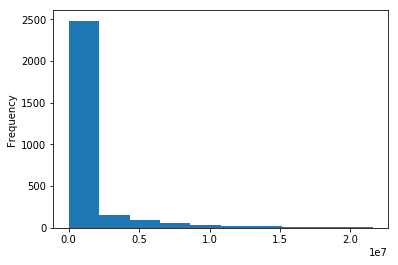

In [10]:
data.iloc[:,10].plot(kind = 'hist')

BTC_DIFFICULTY

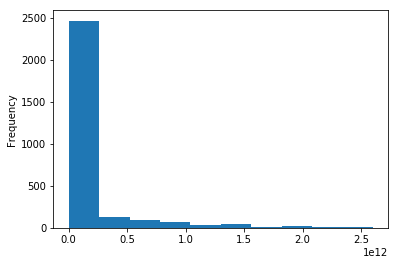

In [11]:
data.iloc[:,11].plot(kind = 'hist')

BTC_MINERS_REVENUE

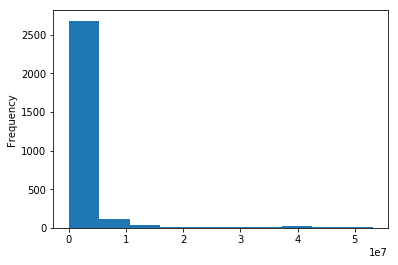

In [12]:
data.iloc[:,12].plot(kind = 'hist')

BTC_TRANSACTION_FEES

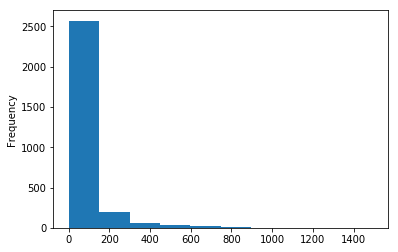

In [13]:
data.iloc[:,13].plot(kind = 'hist')

BTC_COST_PER_TRANSACTION_PERCENT

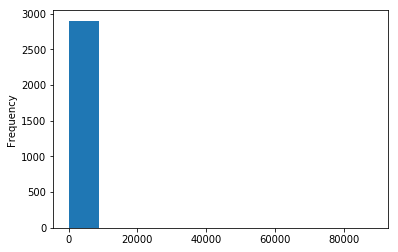

In [14]:
data.iloc[:,14].plot(kind = 'hist')

BTC_COST_PER_TRANSACTION

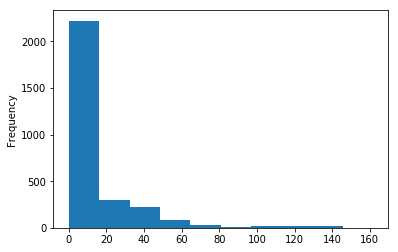

In [15]:
data.iloc[:,15].plot(kind = 'hist')

BTC_N_UNIQUE_ADDRESSES

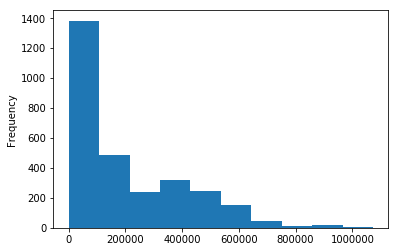

In [16]:
data.iloc[:,16].plot(kind = 'hist')

BTC_N_TRANSACTIONS

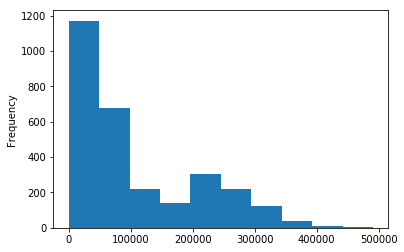

In [17]:
data.iloc[:,17].plot(kind = 'hist')

BTC_N_TRANSACTIONS

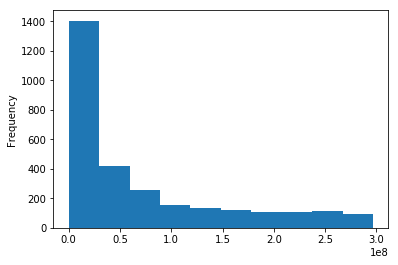

In [18]:
data.iloc[:,18].plot(kind = 'hist')

BTC_N_TRANSACTIONS_EXCLUDING_POPULAR

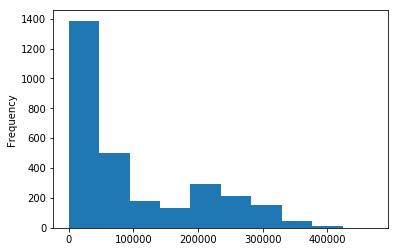

In [19]:
data.iloc[:,19].plot(kind = 'hist')

BTC_N_TRANSACTIONS_EXCLUDING_CHAINS_LONGER_THAN_100

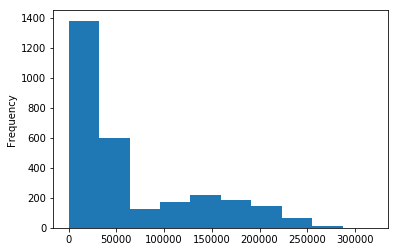

In [20]:
data.iloc[:,20].plot(kind = 'hist')

BTC_OUTPUT_VOLUME

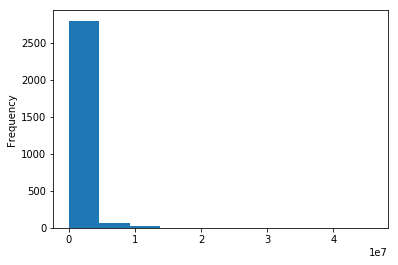

In [21]:
data.iloc[:,21].plot(kind = 'hist')

BTC_ESTIMATED_TRANSACTION_VOLUME

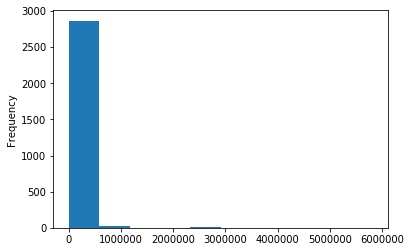

In [22]:
data.iloc[:,22].plot(kind = 'hist')

BTC_ESTIMATED_TRANSACTION_VOLUME_USD

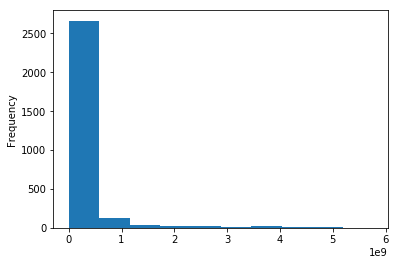

In [23]:
data.iloc[:,23].plot(kind = 'hist')

Th above visualizations help understand whcih features have values across a larger range, and which don't. The features where the range of values is small may not be very helpful in predicting the market prices, as we have already seen that the market price values are spread over a large range.

MISSING VALUES

In [24]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [25]:
data = data.fillna(method = 'bfill')

In [26]:
data.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

The number of missing observations are not too high, but in order to ensure that the entire data-set can be used to build a model, the missing values need to be imputed. The most appropriate method is 'bfill' as it uses the value of the previous observation to fill in missing values. This method is most appropriate as, similar to share prices, the price of a bitcoin in day X, is highly correlated with the price of the bitcoin in day X-1.

CORRELATION AMONGST FEATURES - MULTICOLLINEARITY

While building a predictive model, it is important to understand which features are highly correlated amongst themselves, and also understand whcih features are almost exactly correlated with the predicted value (data leakage), and they must be dealt with accordingly.
While there are many methods to deal with the problems mentioned above, in this situation, we will be dropping the features that are highly correlated amongst themselves. We will also not consider features that are almost perfectly correlated with the market price of bitcoin. We expect that market_cap and transaction_volume_usd will be very highly correlated with the market price.

In [27]:
def color_high_val(val):
    color = "red" if val > 0.9 else 'black' 
    return 'color: %s' % color

In [28]:
corr_output = data.corr(method = 'pearson', min_periods = 1)

In [29]:
corr_output.style.applymap(color_high_val)

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,year
btc_market_price,1,0.393609,0.999784,0.86884,0.67482,0.544033,-0.0764,0.544125,0.281256,0.920876,0.915275,0.986732,0.806253,-0.0135173,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.0508938,0.968308,0.480313
btc_total_bitcoins,0.393609,1,0.385653,0.286225,0.779857,0.852814,0.277629,0.832797,0.675477,0.489695,0.501309,0.384467,0.473625,-0.0790263,0.373916,0.821887,0.834259,0.78402,0.81599,0.801758,0.29357,0.215652,0.38896,0.967911
btc_market_cap,0.999784,0.385653,1,0.869293,0.673148,0.541357,-0.0807452,0.541746,0.277972,0.922108,0.916445,0.985393,0.806738,-0.0129246,0.805635,0.660761,0.566896,0.678136,0.555714,0.564836,0.112418,0.0513607,0.968534,0.473882
btc_trade_volume,0.86884,0.286225,0.869293,1,0.521402,0.416142,-0.0691507,0.430461,0.218864,0.758376,0.753195,0.874973,0.733273,-0.00939826,0.68995,0.539462,0.453818,0.525617,0.442161,0.449893,0.0973455,0.0560702,0.896047,0.352526
btc_blocks_size,0.67482,0.779857,0.673148,0.521402,1,0.956191,0.0541111,0.946993,0.513518,0.826144,0.84147,0.62324,0.745545,-0.029984,0.446102,0.966839,0.950442,0.999785,0.952261,0.961439,0.252485,0.1547,0.672631,0.883525
btc_avg_block_size,0.544033,0.852814,0.541357,0.416142,0.956191,1,0.147514,0.977887,0.558922,0.687581,0.705852,0.505197,0.653935,-0.0367168,0.335611,0.967663,0.97794,0.954478,0.976108,0.969182,0.296547,0.191663,0.55309,0.931131
btc_n_orphaned_blocks,-0.0764,0.277629,-0.0807452,-0.0691507,0.0541111,0.147514,1,0.114178,0.0688029,-0.0921027,-0.0929277,-0.052337,-0.0958506,-0.0158031,0.00949664,0.122447,0.108167,0.0544931,0.115909,0.0737916,-0.00627496,0.0182998,-0.0809438,0.24102
btc_n_transactions_per_block,0.544125,0.832797,0.541746,0.430461,0.946993,0.977887,0.114178,1,0.56344,0.670598,0.693509,0.505025,0.672154,-0.036007,0.31821,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285,0.910435
btc_median_confirmation_time,0.281256,0.675477,0.277972,0.218864,0.513518,0.558922,0.0688029,0.56344,1,0.354491,0.378702,0.252706,0.418262,-0.055212,0.183549,0.518405,0.549321,0.518989,0.514513,0.539275,0.307823,0.2154,0.284685,0.632663
btc_hash_rate,0.920876,0.489695,0.922108,0.758376,0.826144,0.687581,-0.0921027,0.670598,0.354491,1,0.990129,0.879517,0.808731,-0.0158678,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.0819806,0.887864,0.604894


The above correlation matrix does indeed prove that out hypthesis was correct. But it also brings to light certain relationships that we might not have suspected, for instance, the high correlation between hash_rate and market_price, as well as the high correlation of hash_rate with difficulty and miners_revenue.
While selecting the initial combination of features, these ought to be factored into.

DATA SCALING

As observed earlier, the range of values for both features and the predicted values is very high. Thus, we will need to scale the data in order for the model to be optimal. The most appropriate method of scaling, for the given data-set, is the MinMax scaler. As this ensures that the maximum and minimum values for each feature are captured, and the inherrent distributionof values is also captured.

METHODOLOGY

Iterations with various combination of features, based on an understanding if bitcoin pricing and the data-set will be run. All the iterations will be run on Ridge Regression, and the iteration with the best result, will then be run on all models to compare the results. Ridge regression is used as the base model as the Alpha value penalizes multi-collinearity. We know that some features are definitely correlated with one another based on the correlation matrix observed earlier, which is why this method is the most approprate base model to decide on the optimal combination of features to be included in all models.

FEATURE SELECTION

While dealing with a large number of features, such at this data-set, it is standard procedure to try models with various permutations and combinations of features, before deciding on which set of features should be implemented across different models. This is done as it is not possible to have a very accurate understanding of how the features will interact with one another, despite having spent sometime on data exploration.

ITERATION 1

The features that were DROPPED, along with the reasoning for the same are listed below.

1) btc_n_orphaned_blocks - Range of values was minimal, given that we are predicting a btc_market_price which has values spread across a wide range, it is unlikely that a feature which has values in a much lesser range will improve model performance

2) btc_median_confirmation_time - Range of values was minimal, given that we are predicting a btc_market_price which has values spread across a wide range, it is unlikely that a feature which has values in a much lesser range will improve model performance

3) btc_hash_rate - Highly correlated with btc_market_price, including this in the model would result in date leakage


4) btc_difficulty - Highly correlated with btc_market_price, including this in the model would result in date leakage


5) btc_miners_revenue - Highly correlated with btc_market_price, including this in the model would result in date leakage


6) btc_transaction_fees - Range of values was minimal, given that we are predicting a btc_market_price which has values spread across a wide range, it is unlikely that a feature which has values in a much lesser range will improve model performance


7) btc_cost_per_transaction_percent - Range of values was minimal, given that we are predicting a btc_market_price which has values spread across a wide range, it is unlikely that a feature which has values in a much lesser range will improve model performance

8) btc_output_volume - Range of values was minimal, given that we are predicting a btc_market_price which has values spread across a wide range, it is unlikely that a feature which has values in a much lesser range will improve model performance

9) btc_estimated_transaction_volume - Range of values was minimal, given that we are predicting a btc_market_price which has values spread across a wide range, it is unlikely that a feature which has values in a much lesser range will improve model performance

10) btc_estimated_transaction_volume_usd - Range of values was minimal, and feature was also highly correlated with btc_market_price, including this would result in data leakage

In [30]:
data_1 = data.drop(['Date','year', 'btc_market_price', 'btc_n_orphaned_blocks','btc_median_confirmation_time','btc_hash_rate','btc_difficulty','btc_miners_revenue', 'btc_transaction_fees', 'btc_cost_per_transaction_percent', 'btc_output_volume','btc_estimated_transaction_volume', 'btc_estimated_transaction_volume_usd'], axis = 1)

In [31]:
y_1 = data[['btc_market_price']]

In [32]:
test_1 = test.drop(['Date', 'btc_n_orphaned_blocks','btc_median_confirmation_time','btc_hash_rate','btc_difficulty','btc_miners_revenue', 'btc_transaction_fees', 'btc_cost_per_transaction_percent', 'btc_output_volume','btc_estimated_transaction_volume', 'btc_estimated_transaction_volume_usd'], axis = 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge

In [34]:
data_1_scaled = scaler.fit_transform(data_1)
test_1_scaled = scaler.fit_transform(test_1)

In [35]:
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge_data_1 = Ridge(alpha = this_alpha).fit(data_1_scaled, y_1)
    r2_train = linridge_data_1.score(data_1_scaled, y_1)
    r2_test = linridge_data_1.score(test_1_scaled, test_y)
    num_coeff_bigger = np.sum(abs(linridge_data_1.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
num abs(coeff) > 1.0: 12, r-squared training: 1.00, r-squared test: -72.70

Alpha = 1.00
num abs(coeff) > 1.0: 12, r-squared training: 1.00, r-squared test: -51.32

Alpha = 10.00
num abs(coeff) > 1.0: 12, r-squared training: 0.97, r-squared test: -16.23

Alpha = 20.00
num abs(coeff) > 1.0: 12, r-squared training: 0.94, r-squared test: -8.45

Alpha = 50.00
num abs(coeff) > 1.0: 11, r-squared training: 0.86, r-squared test: -7.98

Alpha = 100.00
num abs(coeff) > 1.0: 12, r-squared training: 0.76, r-squared test: -19.88

Alpha = 1000.00
num abs(coeff) > 1.0: 12, r-squared training: 0.40, r-squared test: -88.82



Based on the above results, Alpha = 20 produced the best results, although that does leave much to be desired. 

Implementing one model on the features that were selected is not an appropriate method to conclude on the final set of features. It is recommended that another combination of features are implemented on the same model before coming to a conclusion on which features must be implemented across all models, to compare and evaluate the model performance.

ITERATION 2 

The features listed below were DROPPED, the reasons for which are provided alongside.

1) btc_market_cap - This feature is highly correlated with btc_market_price, including this would resut in data leakage


2) btc_avg_block_size - While examining the values in the correlation matrix, this feature had very low correlation with btc_market_price, which indicates that this feature may not contribute postively towards predicting btc_market_price


3) btc_n_orphaned_blocks - This feature has a very small range of values, as mentioned earlier


4) btc_miners_revenue - Highly correlated with btc_market_price, including this feature would result in data leakage


5) btc_cost_per_transaction - This feature is miners revenue divided by the number of transactions. Since miners revenue is highly correlated with btc_market_price, any feature that is derived from miners revenue will also be highly correlated with btc_market_price, and including such feature will result in data leakage


6) btc_n_transactions_total - This is a cummulative total of all transactions till date and it is highly doubtful that cummulative features will add value while trying to predict bitcoin market prices.


7) btc_n_transactions_excluding_popular - Similar to the previous feature, this is also a cummulative total, and it is highly unlikely that a cummulatove feature will add value while trying to predict bitcoin market prices.


8) btc_output_volume - As seen during the data visualization process, this feature had a very small range of values, and since we are trying to predict values that are spread across a large range, this feature may not be very helpful.


9) btc_estimated_transaction_volume - As this feature is an estimation, and not based on actual scenario, it is unlikely that it will be helpful in predicting market price of bitcoin


10) btc_estimated_transaction_volume_usd - This feature was highly correlated with btc_market_price and including this will result in data leakage.


11) btc_n_excluding_chains_longer_than_100 - Given a basic understanding of blockchain technology and bitcoin pricing, this feature does not seem to be one that will contribute towards predicting bitcoin market prices

The features that are selected for interation 2 are different from iteration 1, and we hope to see better results.

In [36]:
data_2 = data.drop(['Date','year', 'btc_market_price', 'btc_market_cap', 'btc_avg_block_size', 'btc_n_orphaned_blocks','btc_miners_revenue', 'btc_cost_per_transaction_percent', 'btc_n_transactions_total','btc_n_transactions_excluding_popular', 'btc_output_volume','btc_estimated_transaction_volume','btc_estimated_transaction_volume_usd','btc_n_transactions_excluding_chains_longer_than_100'], axis = 1)

In [37]:
test_2 = test.drop(['Date', 'btc_market_cap', 'btc_avg_block_size', 'btc_n_orphaned_blocks','btc_miners_revenue', 'btc_cost_per_transaction_percent', 'btc_n_transactions_total','btc_n_transactions_excluding_popular', 'btc_output_volume','btc_estimated_transaction_volume','btc_estimated_transaction_volume_usd','btc_n_transactions_excluding_chains_longer_than_100'], axis = 1)

In [38]:
data_2_scaled = scaler.fit_transform(data_2)
test_2_scaled = scaler.fit_transform(test_2)

In [39]:
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge_data_2 = Ridge(alpha = this_alpha).fit(data_2_scaled, y_1)
    r2_train = linridge_data_2.score(data_2_scaled, y_1)
    r2_test = linridge_data_2.score(test_2_scaled, test_y)
    num_coeff_bigger = np.sum(abs(linridge_data_2.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
num abs(coeff) > 1.0: 11, r-squared training: 0.96, r-squared test: -34.66

Alpha = 1.00
num abs(coeff) > 1.0: 11, r-squared training: 0.96, r-squared test: -25.84

Alpha = 10.00
num abs(coeff) > 1.0: 11, r-squared training: 0.94, r-squared test: -8.39

Alpha = 20.00
num abs(coeff) > 1.0: 11, r-squared training: 0.92, r-squared test: -6.50

Alpha = 50.00
num abs(coeff) > 1.0: 11, r-squared training: 0.86, r-squared test: -10.10

Alpha = 100.00
num abs(coeff) > 1.0: 11, r-squared training: 0.78, r-squared test: -20.87

Alpha = 1000.00
num abs(coeff) > 1.0: 11, r-squared training: 0.39, r-squared test: -87.70



The results for iteration 2 are marginally better than the ones we saw for iteration 1, but there definitely is more to be desired.

Despite the fact that very different combination of features were selected for both iterations, there has not been much of an improvement in the model performance. Perhaps the issue is not with the feature selection, but with regards to the time line for which the data is considered. Earlier, we saw that from 2010-2017 the market price of bitcoins remained relatively stable. Thus, using data points from that time period, is not very reflective of the current market prices of bitcoins.

ITERATION 3 - Using the features in data_1, but including data only from 2016 onwards, this will be referred to as data_3

In [40]:
data_2016_onwards = data.loc[data['year'] > 2015]

In [41]:
data_3 = data_2016_onwards.drop(['Date','year', 'btc_market_price', 'btc_n_orphaned_blocks','btc_median_confirmation_time','btc_hash_rate','btc_difficulty','btc_miners_revenue', 'btc_transaction_fees', 'btc_cost_per_transaction_percent', 'btc_output_volume','btc_estimated_transaction_volume', 'btc_estimated_transaction_volume_usd'], axis = 1)

In [42]:
test['year'] = pd.DatetimeIndex(test['Date']).year

In [43]:
test_2016_onwards = test.loc[test['year'] > 2015]

In [44]:
test_3 = test_2016_onwards.drop(['Date','year', 'btc_n_orphaned_blocks','btc_median_confirmation_time','btc_hash_rate','btc_difficulty','btc_miners_revenue', 'btc_transaction_fees', 'btc_cost_per_transaction_percent', 'btc_output_volume','btc_estimated_transaction_volume', 'btc_estimated_transaction_volume_usd'], axis = 1)

In [45]:
y_2016_onwards = data_2016_onwards[['btc_market_price']]

In [46]:
data_3_scaled = scaler.fit_transform(data_3)
test_3_scaled = scaler.fit_transform(test_3)

In [47]:
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge_data_3 = Ridge(alpha = this_alpha).fit(data_3_scaled, y_2016_onwards)
    r2_train = linridge_data_3.score(data_3_scaled, y_2016_onwards)
    r2_test = linridge_data_3.score(test_3_scaled, test_y)
    num_coeff_bigger = np.sum(abs(linridge_data_3.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
num abs(coeff) > 1.0: 12, r-squared training: 1.00, r-squared test: -76.46

Alpha = 1.00
num abs(coeff) > 1.0: 12, r-squared training: 1.00, r-squared test: -39.39

Alpha = 10.00
num abs(coeff) > 1.0: 12, r-squared training: 0.97, r-squared test: -12.03

Alpha = 20.00
num abs(coeff) > 1.0: 12, r-squared training: 0.94, r-squared test: -6.35

Alpha = 50.00
num abs(coeff) > 1.0: 12, r-squared training: 0.86, r-squared test: -10.48

Alpha = 100.00
num abs(coeff) > 1.0: 12, r-squared training: 0.76, r-squared test: -21.80

Alpha = 1000.00
num abs(coeff) > 1.0: 12, r-squared training: 0.29, r-squared test: -60.75



The above results are very similar to the ones we saw while including the data points from 2010 onwards.
Thus, despite removing observations that were not very representative of the values that we are trying to predict, the model performace has not improved by much.

ITERATION 4 - Using the features in data_2, but including data only from 2016 onwards, this will be referred to as data_4

In [48]:
data_4 = data_2016_onwards.drop(['Date','year', 'btc_market_price', 'btc_market_cap', 'btc_avg_block_size', 'btc_n_orphaned_blocks','btc_miners_revenue', 'btc_cost_per_transaction_percent', 'btc_n_transactions_total','btc_n_transactions_excluding_popular', 'btc_output_volume','btc_estimated_transaction_volume','btc_estimated_transaction_volume_usd','btc_n_transactions_excluding_chains_longer_than_100'], axis = 1)

In [49]:
test_4 = test_2016_onwards.drop(['Date', 'year','btc_market_cap', 'btc_avg_block_size', 'btc_n_orphaned_blocks','btc_miners_revenue', 'btc_cost_per_transaction_percent', 'btc_n_transactions_total','btc_n_transactions_excluding_popular', 'btc_output_volume','btc_estimated_transaction_volume','btc_estimated_transaction_volume_usd','btc_n_transactions_excluding_chains_longer_than_100'], axis = 1)

In [50]:
data_4_scaled = scaler.fit_transform(data_4)
test_4_scaled = scaler.fit_transform(test_4)

In [51]:
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge_data_4 = Ridge(alpha = this_alpha).fit(data_4_scaled, y_2016_onwards)
    r2_train = linridge_data_4.score(data_4_scaled, y_2016_onwards)
    r2_test = linridge_data_4.score(test_4_scaled, test_y)
    num_coeff_bigger = np.sum(abs(linridge_data_4.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
num abs(coeff) > 1.0: 11, r-squared training: 0.99, r-squared test: -46.69

Alpha = 1.00
num abs(coeff) > 1.0: 11, r-squared training: 0.98, r-squared test: -17.97

Alpha = 10.00
num abs(coeff) > 1.0: 11, r-squared training: 0.95, r-squared test: -8.60

Alpha = 20.00
num abs(coeff) > 1.0: 11, r-squared training: 0.92, r-squared test: -9.15

Alpha = 50.00
num abs(coeff) > 1.0: 11, r-squared training: 0.85, r-squared test: -15.07

Alpha = 100.00
num abs(coeff) > 1.0: 11, r-squared training: 0.76, r-squared test: -23.05

Alpha = 1000.00
num abs(coeff) > 1.0: 11, r-squared training: 0.27, r-squared test: -58.46



As with Iteration 3, there does not seem to have been much of an improvement with regards to model performance, despite dropping observations that were not reflective of the values that are to be predicted.

Although there was a marginal improvement in the model performance, ITERATION 2 had the best results. Hence, we can use that combination of features and run it on various models to see which model performs the best.

KNN REGRESSION & CROSS VALIDATION - data_2_scaled, test_2_scaled, y_1 and test_y

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
knnreg_3 = KNeighborsRegressor(n_neighbors = 3).fit(data_2_scaled, y_1)
print(knnreg_3.predict(test_2_scaled))
print('R-squared test score: {:.3f}'
     .format(knnreg_3.score(test_2_scaled, test_y)))

[[  1938.85064867]
 [  3743.06711967]
 [  1032.62      ]
 [   829.91666667]
 [  3126.885147  ]
 [ 14129.578891  ]
 [  6617.192561  ]
 [  5191.72650533]
 [  5191.72650533]
 [  7068.355449  ]
 [ 11598.57155667]
 [ 11420.10055667]
 [ 11138.5       ]
 [ 11598.57155667]]
R-squared test score: -48.898


In [54]:
knnreg_5 = KNeighborsRegressor(n_neighbors = 5).fit(data_2_scaled, y_1)
print(knnreg_5.predict(test_2_scaled))
print('R-squared test score: {:.3f}'
     .format(knnreg_5.score(test_2_scaled, test_y)))

[[  1808.8655968]
 [  3150.8681232]
 [  1033.372    ]
 [   837.49     ]
 [  2509.3898508]
 [ 13215.4177346]
 [  6538.4205532]
 [  4799.4052298]
 [  5731.4856798]
 [  5868.4352428]
 [ 11178.1086   ]
 [ 11119.594    ]
 [ 11119.594    ]
 [ 11189.918268 ]]
R-squared test score: -49.059


In [55]:
knnreg_7 = KNeighborsRegressor(n_neighbors = 7).fit(data_2_scaled, y_1)
print(knnreg_7.predict(test_2_scaled))
print('R-squared test score: {:.3f}'
     .format(knnreg_7.score(test_2_scaled, test_y)))

[[  1759.68453771]
 [  3005.27099771]
 [  1044.30428571]
 [   850.63571429]
 [  2978.90269114]
 [ 13157.690689  ]
 [  6374.10862371]
 [  4674.03749043]
 [  5770.73767614]
 [  5636.32021157]
 [ 11813.46519   ]
 [ 11156.38119   ]
 [ 11188.234     ]
 [ 11206.61281   ]]
R-squared test score: -49.810


It is evident that increasing the number of neighbors does not result in better model performance. n=3 had the best results.

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
scores = cross_val_score(knnreg_3, data_2_scaled, y_1, cv = 4)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [-0.07828276  0.26613741 -0.35542699 -0.38008405]
Average cross-validation score: -0.14


LINEAR REGRESSION - WITH CROSS VALIDATION - data_2_scaled, test_2_scaled, y_1 and test_y

In [58]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(data_2_scaled, y_1)

In [59]:
print('R-squared score (test): {:.3f}'
     .format(linreg.score(test_2_scaled, test_y)))

R-squared score (test): -34.656


Linear Regression seems to have performed better than KNN Regression. Let us confirm this with cross validation.

In [60]:
scores = cross_val_score(linreg, data_2_scaled, y_1, cv = 6)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [ -9.59682367e+02  -2.58583872e+03  -3.02604809e+00  -2.76496249e+00
  -5.10426637e+00   1.60421121e-01]
Average cross-validation score: -592.71


The best average cross validation score was for when CV = 6.

RIDGE REGRESSION - WITH ALPHA AND CROSS VALIDATION - data_2_scaled, test_2_scaled, y_1 and test_y

In [61]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(data_2_scaled, y_1)
    r2_train = linridge.score(data_2_scaled, y_1)
    r2_test = linridge.score(test_2_scaled, test_y)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 11, r-squared training: 0.96, r-squared test: -34.66

Alpha = 1.00
num abs(coeff) > 1.0: 11, r-squared training: 0.96, r-squared test: -25.84

Alpha = 10.00
num abs(coeff) > 1.0: 11, r-squared training: 0.94, r-squared test: -8.39

Alpha = 20.00
num abs(coeff) > 1.0: 11, r-squared training: 0.92, r-squared test: -6.50

Alpha = 50.00
num abs(coeff) > 1.0: 11, r-squared training: 0.86, r-squared test: -10.10

Alpha = 100.00
num abs(coeff) > 1.0: 11, r-squared training: 0.78, r-squared test: -20.87

Alpha = 1000.00
num abs(coeff) > 1.0: 11, r-squared training: 0.39, r-squared test: -87.70



As seen earlier, Alpha = 20 has the best results. Using that model, and cross validating.

In [62]:
linridge = Ridge(alpha=20.0).fit(data_2_scaled, y_1)

In [63]:
scores = cross_val_score(linridge, data_2_scaled, y_1, cv = 4)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [ -1.57725629e+03  -2.21115966e+00  -8.03832434e-01  -2.24978018e-01]
Average cross-validation score: -395.12


Increasing the folds beyond 4 results in worse performance.

LASSO REGRESSION - WITH ALPHA AND CROSS VALIDATION

In [64]:
from sklearn.linear_model import Lasso
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(data_2_scaled, y_1)
    r2_train = linlasso.score(data_2_scaled, y_1)
    r2_test = linlasso.score(test_2_scaled, test_y)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 9, r-squared training: 0.96, r-squared test: -34.15

Alpha = 1.00
Features kept: 9, r-squared training: 0.96, r-squared test: -31.79

Alpha = 2.00
Features kept: 8, r-squared training: 0.95, r-squared test: -27.83

Alpha = 3.00
Features kept: 8, r-squared training: 0.95, r-squared test: -24.66

Alpha = 5.00
Features kept: 7, r-squared training: 0.95, r-squared test: -21.88

Alpha = 10.00
Features kept: 6, r-squared training: 0.94, r-squared test: -18.98

Alpha = 20.00
Features kept: 5, r-squared training: 0.91, r-squared test: -30.42

Alpha = 50.00
Features kept: 3, r-squared training: 0.87, r-squared test: -57.78



Alpha = 10 has the best results amongst those. Using that model for cross validation.

In [65]:
linlasso = Lasso(alpha=10.0, max_iter = 10000).fit(data_2_scaled, y_1)

In [66]:
scores = cross_val_score(linlasso, data_2_scaled, y_1, cv = 5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [ -9.73730323e+02  -1.40569630e+02  -4.71514605e+01  -2.60613221e+00
  -4.75368361e-01]
Average cross-validation score: -232.91


Cv = 5 seems to produce the best results.

POLYNOMIAL REGRESSION

In [67]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

During the data exploration stage, we had observed numerous times that many features in the dataset with correlated with one another, which is why ridge regression was used as the most appropriate method to arrive at a list of features that could be tried on various models. As a result of previously observed multi-collinearity, and the fact that adding polynomial features can result in over-fitting, it is necessary to have a parameter that penalizes the same. This is why it is most appropriate to add polynomial features to a ridge regression model for the given data-set.

In [68]:
linreg_ridge = Ridge().fit(data_2_scaled, y_1)

In [69]:
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg_ridge.score(data_2_scaled, y_1)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg_ridge.score(test_2_scaled, test_y)))

(poly deg 2 + ridge) R-squared score (training): 0.956
(poly deg 2 + ridge) R-squared score (test): -25.840


In [70]:
scores = cross_val_score(linreg_ridge, data_2_scaled, y_1, cv = 2)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [-70.13167277   0.20018219]
Average cross-validation score: -34.97


Although this is lesser than default CV value, this seems to produce the best results.

SUPPORT VECTOR REGRESSION 

The mandatory parameters for each support vector regression are epsilon and c. Epsilon defines a margin of error, for which there is no penalty given to errors. Higher the epsilon value, larger the erros you admit in your solution. The C parameter indicates how much you would like to avoid misclassification, or in the case of regression, how much of a difference between actual and predicted value. For large values of C, SVR will choose a smaller margin hyper-plane.
From the above understanding of the parameters required, in order to have a model that is accurate, smaller epsilon values and larger C values are recommended.

Grid Search is a method where a Support Vector Regression model is trained for every combination of "C" and "gamma", and vross validation is used to arrive at the best combination of features. Using grid search, we can arrive at the most optimal values of "C" and "gamme", and use that in SVR with different kernel types to arrive at the one that performs the best.

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [72]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(), param_grid, cv=5)

grid_search.fit(data_2_scaled, y_1)

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: -7.21


In [74]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


The above output indicates that C=10 and gamme = 0.1 are the most optimal values. These values can be used to implement Support Vector Regression with kernels.

SUPPORT VECTOR REGRESSION WITH KERNELS

There are three types of kernels that are available - Linear, rbf and poly. Using the optimal feature combinations that was provided by grid search, the three kernels can be implemented to see which one performs the best.

In [75]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear', epsilon = 0.1, C = 10)
svr.fit(data_2_scaled, y_1)
svr.score(test_2_scaled, test_y)

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-82.926274100569856

In [76]:
svr = SVR(kernel = 'rbf', epsilon = 0.1, C = 10)
svr.fit(data_2_scaled, y_1)
svr.score(test_2_scaled, test_y)

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-130.55726648075768

In [77]:
svr = SVR(kernel = 'poly', epsilon = 0.1, C = 10)
svr.fit(data_2_scaled, y_1)
svr.score(test_2_scaled, test_y)

C:\Users\Anvitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-150.85970697795628

COMPARING THE PERFORMANCE OF MODELS IMPLEMENTED

Thus far, data_2_scaled has been used on 7 different models. We now compare the R square value of those 7 models to arrive at the one that is most optimal for the given data-set.

KNN REGRESSION --> R square = -49.810; with cross validation R square = -0.14

LINEAR REGRESSION --> R square = -34.656; with cross validation R square = -592.71

RIDGE REGRESSION --> R square = -6.50; with cross validation R square = -395.12

LASSO REGRESSION --> R square = -18.98; with cross validation R square = -232.91

POLYNOMIAL REGRESSION WITH RIDGE --> R square = -25.840; with cross validation R square = -34.97

SUPPORT VECTOR REGRESSION WITHOUT KERNEL --> -7.21

SUPPORT VECTOR WITH LINEAR KERNEL --> -82.92

While evaluating models, the cross validation r square should be considered over the initial r squared value, as cross validation ensures that the model does not over-fit, and also removes any bias from the model as the same sample is used to build and well as validate the model.

The model with the best cross validation r square, is the KNN regression model.

CONCLUSION

From the above results, the most appropriate model for predicting bitcoin market prices in the KNN regression model, where number of neighbors = 3.

In [78]:
knnreg_5 = KNeighborsRegressor(n_neighbors = 5).fit(data_2_scaled, y_1)
print(knnreg_5.predict(test_2_scaled))
print('R-squared test score: {:.3f}'
     .format(knnreg_5.score(test_2_scaled, test_y)))

[[  1808.8655968]
 [  3150.8681232]
 [  1033.372    ]
 [   837.49     ]
 [  2509.3898508]
 [ 13215.4177346]
 [  6538.4205532]
 [  4799.4052298]
 [  5731.4856798]
 [  5868.4352428]
 [ 11178.1086   ]
 [ 11119.594    ]
 [ 11119.594    ]
 [ 11189.918268 ]]
R-squared test score: -49.059


NOTE

R square is a measure that is used to evaluate regression models. Typically R sqaure values range from 0 to 1 and a "good" model had r square values equal to or greater than 0.85.

In the given data-set, all the models that were implemented had negative r sqaure values. This is an indication that the model is performing worse than random guessing. There are a few possible reasons for that:

1) While building a predictive model using time series data, ususally the data has to be made stationery before implementing it in a model. In other words, excessive spikes and fluctuations need to be dealt with, before implementing any predictive models.

2) Bitcoin prices, similar to share prices, are highly dependent on the price on the previous day. In other words, while predicting the bitcoin price for Xth day, the bitcoin price on (x-1)th will have a significantly higher influence than the bitcoin price on (x-2)th day. This means that more recent observations need to be given higher weights. This was not implemented in the above scenario.

3) Not enough features in the data-set - The prices of bitcoin have surged drastically over the past year or so, and there are many factors that have contributed to this. These factors are not perhaps represented in the features that were a part of the data-set.

To conclude, based on the available data, the best predictive model that could be implemented was the KNN regression, with n=3.